# 1. Class (Role and Subrole) Distributions



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

# Mount drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Define the base directory once
BASE_DIR = "/content/drive/MyDrive/Llama_3B_Instruct_with_Pre-constructed_Prompts"

# Function to generate full paths from base path
def path_builder(relative_path):
    """Returns the full path by combining BASE_DIR with the given relative path."""
    from pathlib import Path
    return str(Path(BASE_DIR) / relative_path)

Mounted at /content/drive


In [2]:
train_df = pd.read_csv(path_builder("Dataset_EN_PT/train_data/train.csv"))
test_df = pd.read_csv(path_builder("Dataset_EN_PT/test_data/test.csv"))
val_df = pd.read_csv(path_builder("Dataset_EN_PT/val_data/val.csv"))


--- Main Role Total Distribution ---
     main_role  count
0   Antagonist   1056
1     Innocent    398
2  Protagonist    483

--- Main Role and Subroles Distribution ---
      main_role fine_grained_roles  count
0    Antagonist              Bigot     54
1    Antagonist        Conspirator    129
2    Antagonist            Corrupt    102
3    Antagonist           Deceiver    109
4    Antagonist  Foreign Adversary    234
5    Antagonist        Incompetent    112
6    Antagonist         Instigator    156
7    Antagonist           Saboteur     48
8    Antagonist                Spy      3
9    Antagonist          Terrorist    100
10   Antagonist            Traitor     23
11   Antagonist             Tyrant     91
12     Innocent          Exploited     19
13     Innocent          Forgotten      9
14     Innocent          Scapegoat     17
15     Innocent             Victim    357
16  Protagonist           Guardian    231
17  Protagonist             Martyr     16
18  Protagonist         Peacema

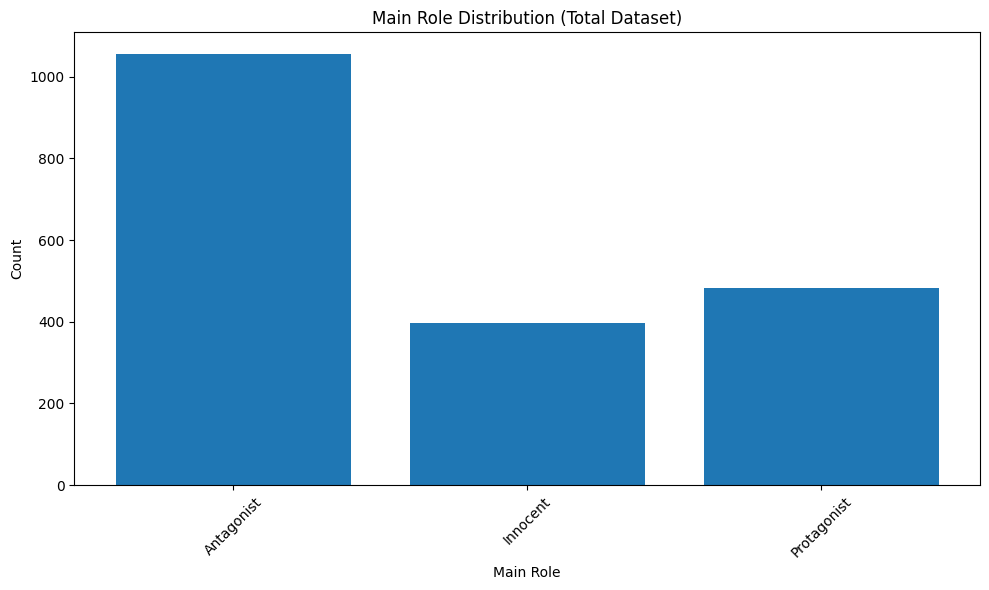

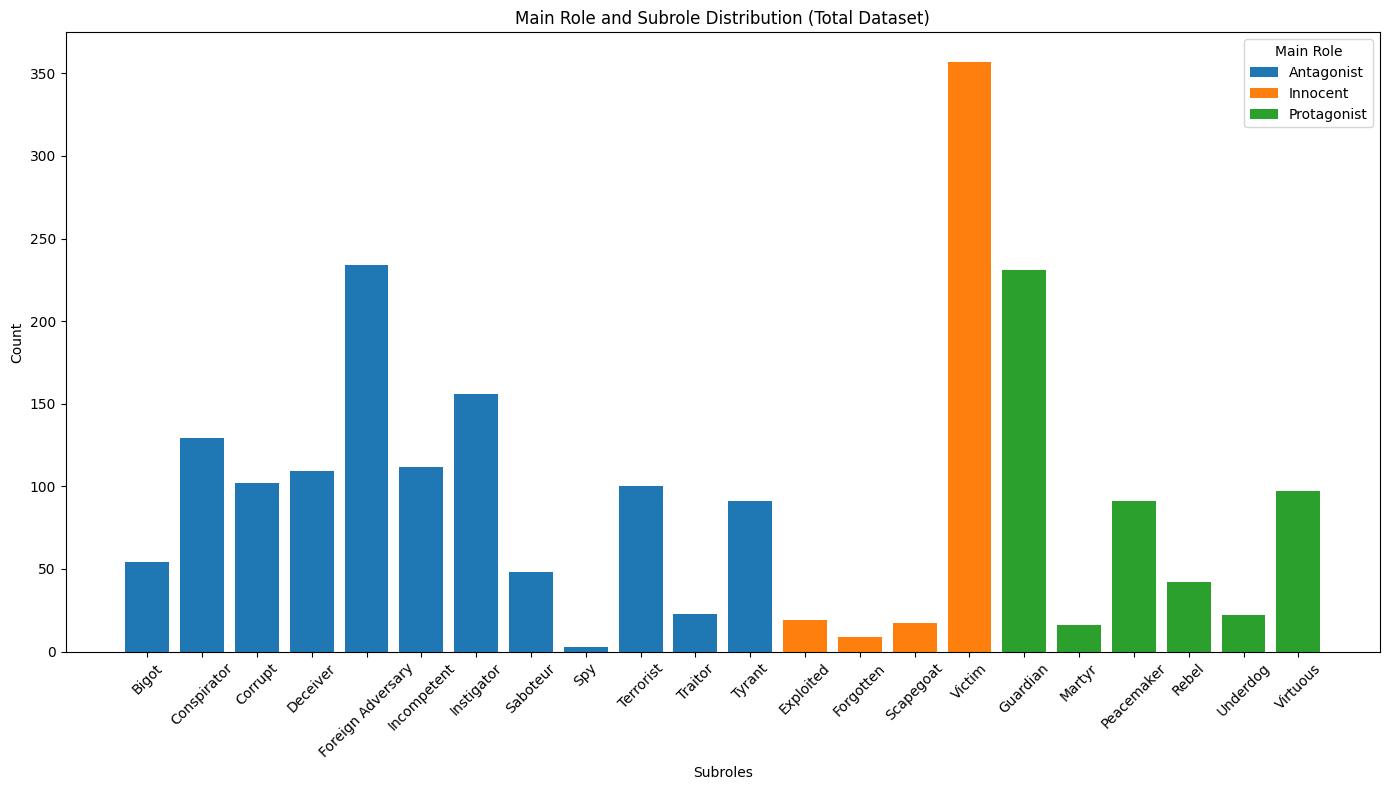

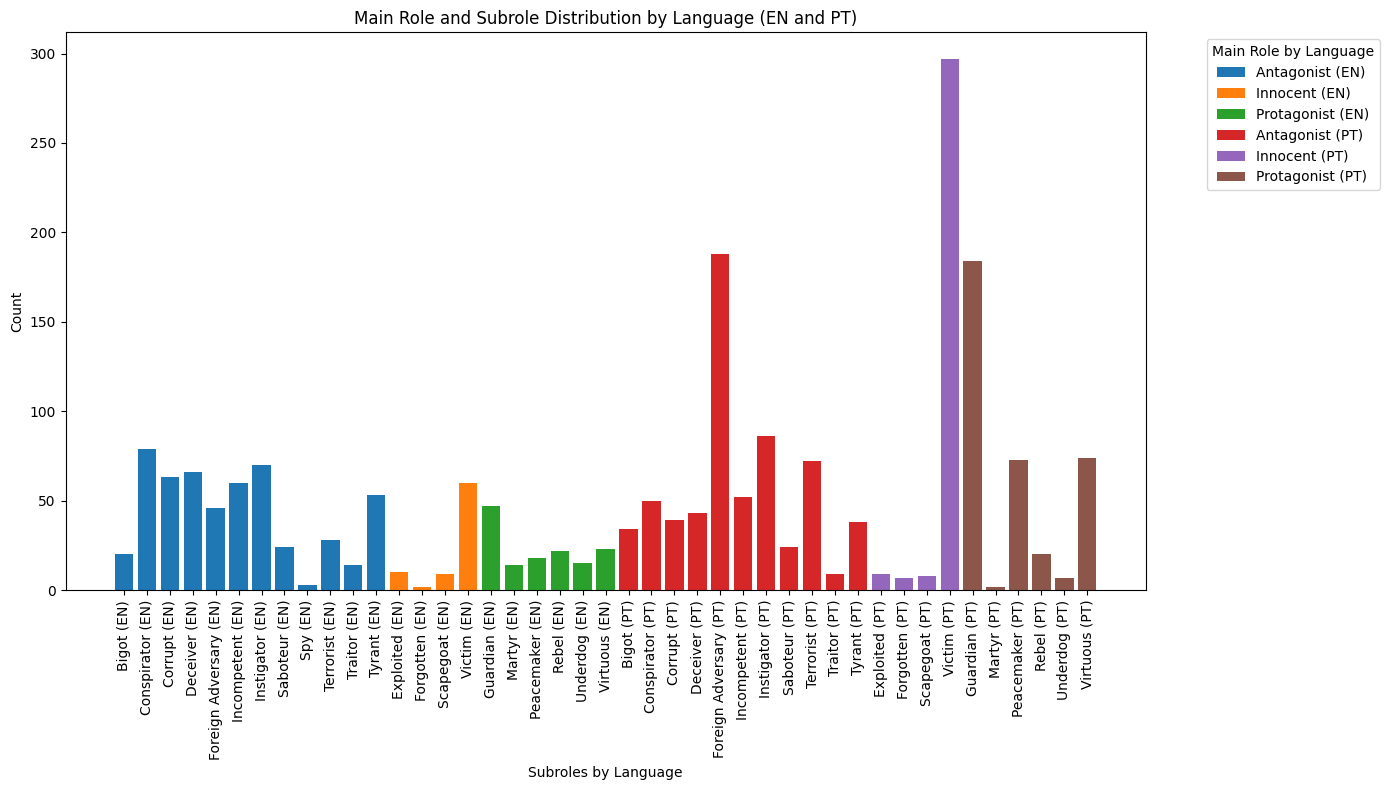

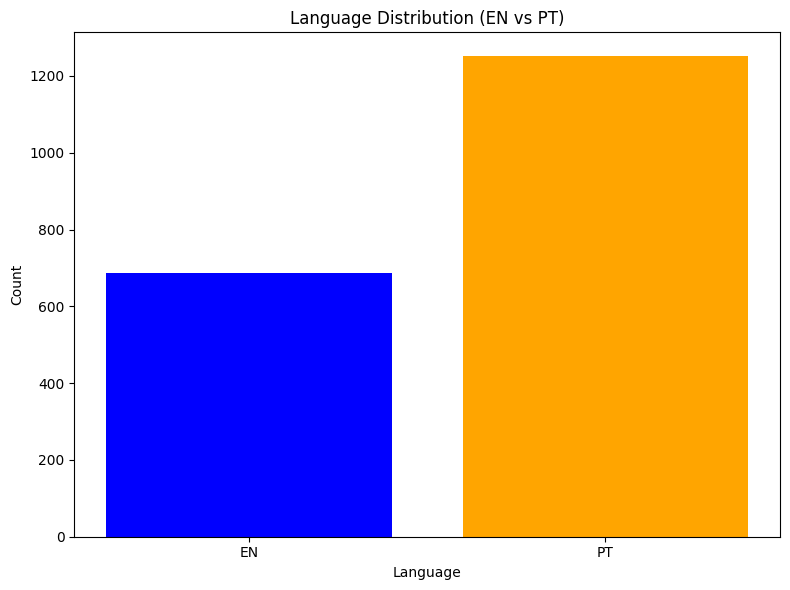

In [3]:

# Add a column indicating the split
train_df['split'] = 'train'
test_df['split'] = 'test'
val_df['split'] = 'val'

# Combine all datasets
combined_df = pd.concat([train_df, test_df, val_df], ignore_index=True)

# Add a 'language' column based on the article_id prefix
def detect_language(article_id):
    if article_id.startswith('EN'):
        return 'EN'
    elif article_id.startswith('PT'):
        return 'PT'
    else:
        return 'Unknown'

combined_df['language'] = combined_df['article_id'].apply(detect_language)

# Convert the 'fine_grained_roles' column from string to list
combined_df['fine_grained_roles'] = combined_df['fine_grained_roles'].apply(literal_eval)

# Flatten the fine-grained roles for total distribution
subroles = combined_df.explode('fine_grained_roles')

# Group by main_role and fine_grained_roles to calculate the total count
main_roles_distribution = combined_df.groupby('main_role').size().reset_index(name='count')
subroles_distribution = subroles.groupby(['main_role', 'fine_grained_roles']).size().reset_index(name='count')

# Group by main_role, subrole, and language for language-specific analysis
subroles_language_distribution = subroles.groupby(['main_role', 'fine_grained_roles', 'language']).size().reset_index(name='count')

# Group by language for total counts
language_distribution = combined_df.groupby('language').size().reset_index(name='count')

# Print dataset details
print("\n--- Main Role Total Distribution ---")
print(main_roles_distribution)

print("\n--- Main Role and Subroles Distribution ---")
print(subroles_distribution)

print("\n--- Main Role and Subroles Distribution by Language ---")
print(subroles_language_distribution)

print("\n--- Language Distribution ---")
print(language_distribution)

# Plotting Main Role Distribution
plt.figure(figsize=(10, 6))
plt.bar(main_roles_distribution['main_role'], main_roles_distribution['count'])
plt.title('Main Role Distribution (Total Dataset)')
plt.xlabel('Main Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('main_role_distribution.png')
plt.show()

# Plotting Main Role and Subrole Distribution
plt.figure(figsize=(14, 8))
for role in subroles_distribution['main_role'].unique():
    role_data = subroles_distribution[subroles_distribution['main_role'] == role]
    plt.bar(role_data['fine_grained_roles'], role_data['count'], label=role)

plt.title('Main Role and Subrole Distribution (Total Dataset)')
plt.xlabel('Subroles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Main Role')
plt.tight_layout()
plt.savefig('main_role_and_subrole_distribution.png')
plt.show()

# Plotting Main Role and Subrole Distribution by Language
plt.figure(figsize=(14, 8))
languages = subroles_language_distribution['language'].unique()
for lang in languages:
    lang_data = subroles_language_distribution[subroles_language_distribution['language'] == lang]
    for role in lang_data['main_role'].unique():
        role_data = lang_data[lang_data['main_role'] == role]
        plt.bar(
            role_data['fine_grained_roles'] + f" ({lang})",
            role_data['count'],
            label=f"{role} ({lang})"
        )

plt.title('Main Role and Subrole Distribution by Language (EN and PT)')
plt.xlabel('Subroles by Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Main Role by Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('main_role_and_subrole_by_language_distribution.png')
plt.show()

# Plotting Language Distribution
plt.figure(figsize=(8, 6))
plt.bar(language_distribution['language'], language_distribution['count'], color=['blue', 'orange'])
plt.title('Language Distribution (EN vs PT)')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('language_distribution.png')
plt.show()


# 2. Statistics on Raw Text Data

In [5]:
import os

# Function to read all raw text files and create a DataFrame
def load_raw_texts(directory):
    raw_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text_content = file.read()
                raw_data.append({'article_id': filename, 'text': text_content})
    return pd.DataFrame(raw_data)

# Load raw documents
raw_texts_df = load_raw_texts(path_builder("Dataset_EN_PT/raw-documents_EN_PT"))

# Preview the raw texts
print(raw_texts_df.head())


         article_id                                               text
0  EN_UA_103445.txt  Vladimir Putin spotted with mystery ‘prominent...
1  EN_UA_100106.txt  Election in Nigeria triggers deluge of 'misinf...
2  EN_CC_100011.txt  Met Office issues urgent warning as 70mph wind...
3  EN_CC_300114.txt  Climate activists dump pink powder on case con...
4  EN_CC_200107.txt  NO MORE AIR TRAVEL: Globalists want to close (...


In [6]:
# Merge raw texts with the combined annotation data
combined_df = combined_df.merge(raw_texts_df, on='article_id', how='left')

# Ensure the 'text' column is available
print(combined_df[['article_id', 'text']].head())


         article_id                                               text
0  EN_CC_100013.txt  Bill Gates Says He Is ‘The Solution’ To Climat...
1  EN_CC_100013.txt  Bill Gates Says He Is ‘The Solution’ To Climat...
2  EN_CC_100013.txt  Bill Gates Says He Is ‘The Solution’ To Climat...
3  EN_UA_300009.txt  Russia: Clashes erupt in Bashkortostan as righ...
4  EN_UA_300009.txt  Russia: Clashes erupt in Bashkortostan as righ...


### Average Words per Document

In [7]:
# Calculate word count for each document
combined_df['word_count'] = combined_df['text'].apply(lambda x: len(str(x).split()))

# Calculate average words per document by language
avg_words_per_document = combined_df.groupby('language')['word_count'].mean().reset_index(name='avg_words_per_document')
print("\n--- Average Words per Document ---")
print(avg_words_per_document)


--- Average Words per Document ---
  language  avg_words_per_document
0       EN              495.390671
1       PT              391.770584


### Vocabulary Size

In [8]:
# Define a function to calculate vocabulary size
def calculate_vocabulary_size(text_series):
    all_words = ' '.join(text_series).split()
    return len(set(all_words))

# Calculate vocabulary size by language
vocab_size = combined_df.groupby('language')['text'].apply(calculate_vocabulary_size).reset_index(name='vocabulary_size')
print("\n--- Vocabulary Size ---")
print(vocab_size)



--- Vocabulary Size ---
  language  vocabulary_size
0       EN            19101
1       PT            19690


### Most Common Words

In [9]:
from collections import Counter

# Define a function to get most common words
def most_common_words(text_series, top_n=5):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Calculate most common words by language
most_common_words_per_lang = combined_df.groupby('language')['text'].apply(lambda x: most_common_words(x, top_n=5)).reset_index(name='most_common_words')
print("\n--- Most Common Words ---")
print(most_common_words_per_lang)



--- Most Common Words ---
  language                                  most_common_words
0       EN  [(the, 19088), (to, 9710), (of, 9137), (and, 7...
1       PT  [(de, 23333), (a, 20524), (o, 12175), (que, 12...


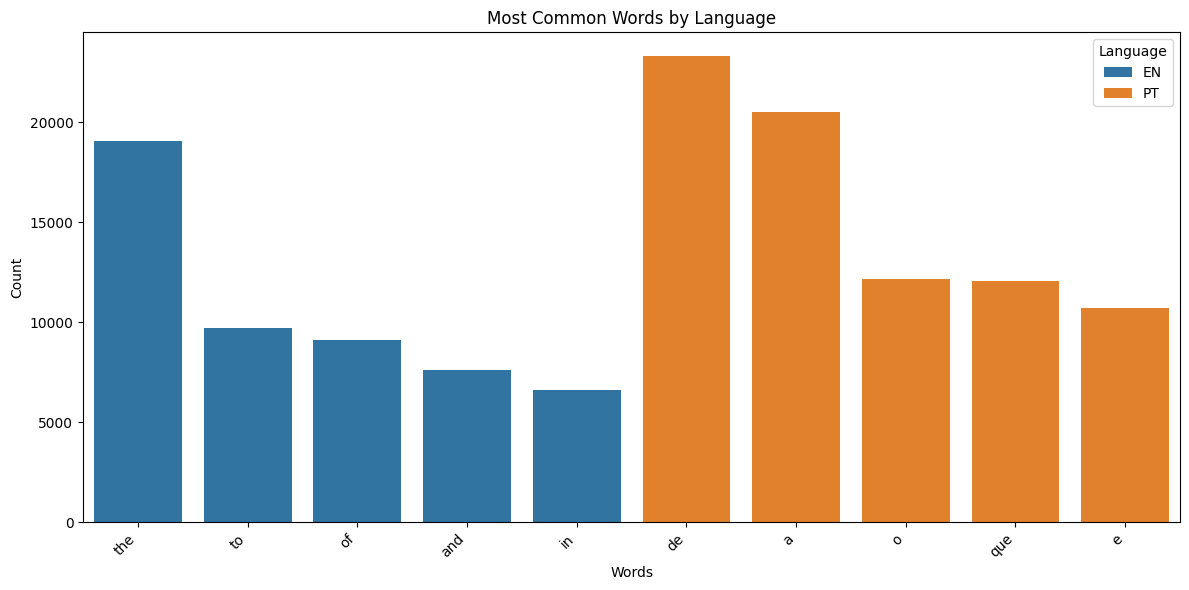

In [11]:
# Expand the most common words into separate rows for plotting
expanded_data = []
for _, row in most_common_words_per_lang.iterrows():
    language = row['language']
    common_words = row['most_common_words']
    for word, count in common_words:
        expanded_data.append({'language': language, 'word': word, 'count': count})

# Create a new DataFrame for plotting
common_words_df = pd.DataFrame(expanded_data)



import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', hue='language', data=common_words_df)

# Customize the plot
plt.title('Most Common Words by Language')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Language')
plt.tight_layout()

# Save and display the plot
plt.savefig('most_common_words_by_language.png')
plt.show()



# 3. Extra

In [ ]:
from graphviz import Digraph

def visualize_model_architecture_with_focal_loss(output_path="model_architecture_with_focal_loss", format="png"):
    dot = Digraph("Model Architecture with Focal Loss", format=format)

    # Define nodes for model components
    dot.node("Input", "Input IDs + Attention Mask")
    dot.node("BaseModel", "XLM-RoBERTa (Transformer Encoder)")
    dot.node("MultiHeadAttention", "Multi-Head Attention Layer")
    dot.node("Dropout", "Dropout")
    dot.node("MainClassifier", "Main Role Classifier (Linear)")
    dot.node("SubClassifier", "Sub Role Classifier (Linear)")
    dot.node("FocalLossMain", "Focal Loss (Main Role)")
    dot.node("FocalLossSub", "Focal Loss (Sub Role)")
    dot.node("OutputMain", "Main Role Predictions")
    dot.node("OutputSub", "Sub Role Predictions")

    # Add edges to represent data flow
    dot.edges([
        ("Input", "BaseModel"),
        ("BaseModel", "MultiHeadAttention"),
        ("MultiHeadAttention", "Dropout"),
        ("Dropout", "MainClassifier"),
        ("Dropout", "SubClassifier"),
        ("MainClassifier", "FocalLossMain"),
        ("SubClassifier", "FocalLossSub"),
        ("FocalLossMain", "OutputMain"),
        ("FocalLossSub", "OutputSub"),
    ])

    # Render the diagram to a file
    dot.render(output_path, view=False)
    return f"{output_path}.{format}"

# Generate the visualization
visualization_path = visualize_model_architecture_with_focal_loss()
visualization_path


'model_architecture_with_focal_loss.png'

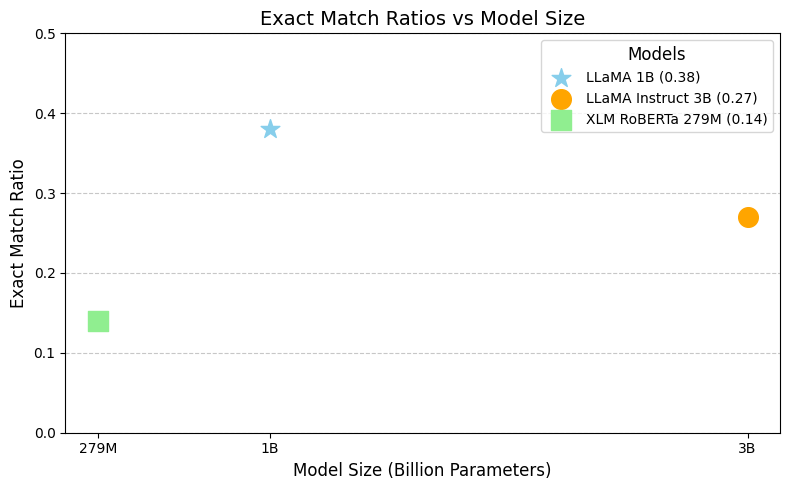

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LLaMA 1B', 'LLaMA Instruct 3B', 'XLM RoBERTa 279M']
exact_match_ratios = [0.38, 0.27, 0.14]
colors = ['skyblue', 'orange', 'lightgreen']

model_sizes = [1, 3, 0.279]  # Sizes in billions

symbols = ['*', 'o', 's']  # Star, circle, and square
colors = ['skyblue', 'orange', 'lightgreen']


# Create the plot with larger symbols
plt.figure(figsize=(8, 5))
for size, ratio, color, symbol, model in zip(model_sizes, exact_match_ratios, colors, symbols, models):
    plt.scatter(size, ratio, color=color, marker=symbol, s=200, label=f'{model} ({ratio:.2f})')  # Increased size to 200

# Title and labels
plt.title('Exact Match Ratios vs Model Size', fontsize=14)
plt.xlabel('Model Size (Billion Parameters)', fontsize=12)
plt.ylabel('Exact Match Ratio', fontsize=12)
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(model_sizes, ['1B', '3B', '279M'])

# Add a legend
plt.legend(title="Models", fontsize=10, title_fontsize=12, loc='upper right')

# Show the diagram
plt.tight_layout()
# plt.show()
# save with thigh rousltion
plt.savefig('exact_match_ratios_vs_model_size.png', dpi=300)